##**Online Workshop - Big Data Analytics untuk Bisnis**

---

*Modul 5 Analisis Prediktif*

#**A. Model Prediktif - Klasifikasi**

##**1 Pemahaman Masalah** 

![](https://lh3.googleusercontent.com/proxy/WJdQU-ybhq8tAy_QxhSTZYOScXVAWQ4LQZORV1_8BADrdra89fZ_FhCEy5767FgNaHUmq625ouiHcWXzdQE3JtrLSwlNMxH_4Pf0EFfxSH9m90-dWUeCBdQXh4P1Ig)

Pada tutorial ini, kita akan belajar untuk membuat sebuah model prediktif menggunakan python. Adapun tahapan pembuatan model prediktif yang akan dibahas pada tutorial kali ini antara lain:

1. Pemahaman masalah
2. Import data
3. Analisis data eksploratif
4. Penyiapan data untuk machine learning
5. Training model
6. Parameter tuning model terpilih
7. Analisis Model Terbaik dan Error Prediksinya
8. Menyimpan model

Pada tutorial kali ini, kita akan membuat sebuah model prediktif untuk memprediksi apakah seorang konsumen perlu dipertahankan (*not churn*) atau dipertahankan (*churn*) dari dataset **Telco Customer Churn** yang diambil dari repositori [Kaggle](https://www.kaggle.com/blastchar/telco-customer-churn). Dataset ini merupakan data profil konsumen berdasarkan perilaku berlangganannya di masa lalu yang dikumpulkan oleh IBM.

Penjelasan masing-masing kolom pada dataset ditampilkan sebagai berikut:

1. `customerID` : ID konsumen
2. `gender` : jenis kelamin konsumen
3. `SeniorCitizen` : apakah konsumen merupakan manula atau bukan (1, 0)
4. `Partner` : apakah konsumen memiliki pasangan atau tidak (Yes, No)
5. `Dependents` : Apakah konsumen memiliki tanggungan atau tidak (Yes, No)
6. `tenure` : jumlah bulan konsumen menggunakan layanan dari perusahaan
7. `PhoneService` : apakah konsumen memiliki layanan telefon atau tidak (Yes, No)
8. `MultipleLines` : Apakah konsumen memiliki banyak jalur komunikasi atau tidak (Yes, No, No phone service)
9. `InternetService` : provider layanan internet yang digunakan konsumen (DSL, Fiber optic, No)
10. `OnlineSecurity`: Apakah konsumen memiliki keamanan online atau tidak (Yes, No, No internet service)
11. `OnlineBackup`: apakah konsumen memiliki *online backup* atau tidak(Yes, No, No internet service)
12. `DeviceProtection`: Apakah konsumen memiliki perlindungan perangkat atau tidak (Yes, No, No internet service)
13. `TechSupport` : Apakah konsumen memiliki dukungan teknis atau tidak (Yes, No, No internet service)
14. `StreamingTV` : Apakah konsumen memiliki TV streaming atau tidak (Yes, No, No internet service)
15. `StreamingMovies` : Apakah konsumen memiliki film streaming atau tidak (Yes, No, No internet service)
16. `Contract` : Jangka waktu kontrak konsumen (Month-to-month, One year, Two year)
17. `PaperlessBilling` : Apakah konsumen memiliki tagihan tanpa kertas atau tidak (Yes, No)
18. `PaymentMethod` : metode pembayaran konsumen (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
19. `MonthlyCharges` : jumlah tagihan bulanan konsumen
20. `TotalCharges` : jumlah total yang dibebankan kepada konsumen
21. `Churn`: apakah konsumen tersebut *churned* atau tidak (Yes or No)

Berdasarkan penjelasan dataset tersebut, tugas anda sebagai data scientist adalah membuat sebuah model klasifikasi untuk memprediksi apakah konsumen akan *churned* atau tidak. Model tersebut nantinya akan membantu perusahaan anda memberikan sinyal kepada tim lainnya sehingga dapat mempersiapkan strategi pemasaran yang diperlukan untuk mencegahnya.



## **2 Import Data**

Dataset yang digunakan, akan diambil dari repository pada tautan [berikut]( https://raw.githubusercontent.com/dianrdn/data/master/customer_churn.csv). Untuk membaca dataset tersebut, kita akan menggunakan fungsi `read_csv` dari modul `Pandas`.

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/dianrdn/data/master/customer_churn.csv', sep = ";")

###*2.1 Cek Dataset*

Hal pertama yang perlu kita cek adalah 5 observasi teratas dan terbawah.

In [ ]:
# cek 5 observasi teratas
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,2985,2985.0,0
1,5575-GNVDE,Male,0,0,0,34,1,DSL,1,0,1,0,0,0,One year,0,Mailed check,5695,18895.0,0
2,3668-QPYBK,Male,0,0,0,2,1,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,5385,10815.0,1
3,7795-CFOCW,Male,0,0,0,45,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),423,184075.0,0
4,9237-HQITU,Female,0,0,0,2,1,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,707,15165.0,1


In [ ]:
# cek 5 observasi terbawah
data.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,1,1,24,1,DSL,1,0,1,1,1,1,One year,1,Mailed check,848,19905.0,0
7039,2234-XADUH,Female,0,1,1,72,1,Fiber optic,0,1,1,0,1,1,One year,1,Credit card (automatic),1032,73629.0,0
7040,4801-JZAZL,Female,0,1,1,11,0,DSL,1,0,0,0,0,0,Month-to-month,1,Electronic check,296,34645.0,0
7041,8361-LTMKD,Male,1,1,0,4,1,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Mailed check,744,3066.0,1
7042,3186-AJIEK,Male,0,0,0,66,1,Fiber optic,1,0,1,1,1,1,Two year,1,Bank transfer (automatic),10565,68445.0,0


Selanjutnya kita dapat menggunakan method `info` untuk memperoleh ringkasan singkat terkait dataset tersebut. Method tersebut akan menampilkan  ringkasan data, seperti: jumlah baris dan kolom, serta nama kolom dan jenis data masing-masing kolom.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   object 


Berdasarkan output yang dihasilkan, terdapat 15 kolom numerik dan 5 kolom karakter. Pada tutorial kali ini, kita tidak akan menggunakan kolom customer ID, dimana kolom tersebut merupakan nilai unik yang mewakili masing-masing konsumen.

In [ ]:
data['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

In [ ]:
data['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [ ]:
data['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [ ]:
data['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [ ]:
data['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

Untuk melihat ringkasan data variabel numerik, jalankan perintah berikut:

In [ ]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.0,0.0,0.0,0.0,1.0
Partner,7043.0,0.483033,0.499748,0.0,0.0,0.0,1.0,1.0
Dependents,7043.0,0.299588,0.458110,0.0,0.0,0.0,1.0,1.0
tenure,7043.0,32.371149,24.559481,0.0,9.0,29.0,55.0,72.0
PhoneService,7043.0,0.903166,0.295752,0.0,1.0,1.0,1.0,1.0
OnlineSecurity,7043.0,0.286668,0.452237,0.0,0.0,0.0,1.0,1.0
OnlineBackup,7043.0,0.344881,0.475363,0.0,0.0,0.0,1.0,1.0
DeviceProtection,7043.0,0.343888,0.475038,0.0,0.0,0.0,1.0,1.0
TechSupport,7043.0,0.290217,0.453895,0.0,0.0,0.0,1.0,1.0
StreamingTV,7043.0,0.384353,0.486477,0.0,0.0,0.0,1.0,1.0


###*2.2 Data Splitting*

Sebelum melangkah lebih jauh alangkah baiknya dataset yang telah kita miliki dipisah menjadi dataset `training` (untuk melatih model) dan dataset `test` (untuk mengevaluasi model). 

Terdapat dua buah jenis sampling pada tahapan *data splitting*, yaitu:

1. *random sampling* : sampling acak tanpa mempertimbangkan adanya strata dalam data
2. *startified random sampling* : sampling dengan memperhatikan strata dalam sebuah variabel.

Dalam proses pembentukan model kali ini, kita akan menggunakan metode kedua dengan tujuan untuk memperoleh distribusi yang seragam dari variabel target.

In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit

In [ ]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data, data['Churn']):
  train = data.loc[train_index]
  test = data.loc[test_index]

## **3 Analisis Data Eksploratif**

Analsiis data eksploratif (EDA) ditujukan untuk mengenali data sebelum kita menentukan algoritma yang cocok digunakan untuk menganalisa data lebih lanjut. EDA merupakan sebuah proses iteratif yang secara garis besar menjawab beberapa pertanyaan umum, seperti:

1. Bagaimana distribusi data pada masing-masing variabel?
2. Apakah terdapat asosiasi atau hubungan antar variabel dalam data?

### *3.1 Variasi*

Distribusi data dapat divisualisasikan menggunakan histogram (variabel numerik) dan barplot(variabel kategori).

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

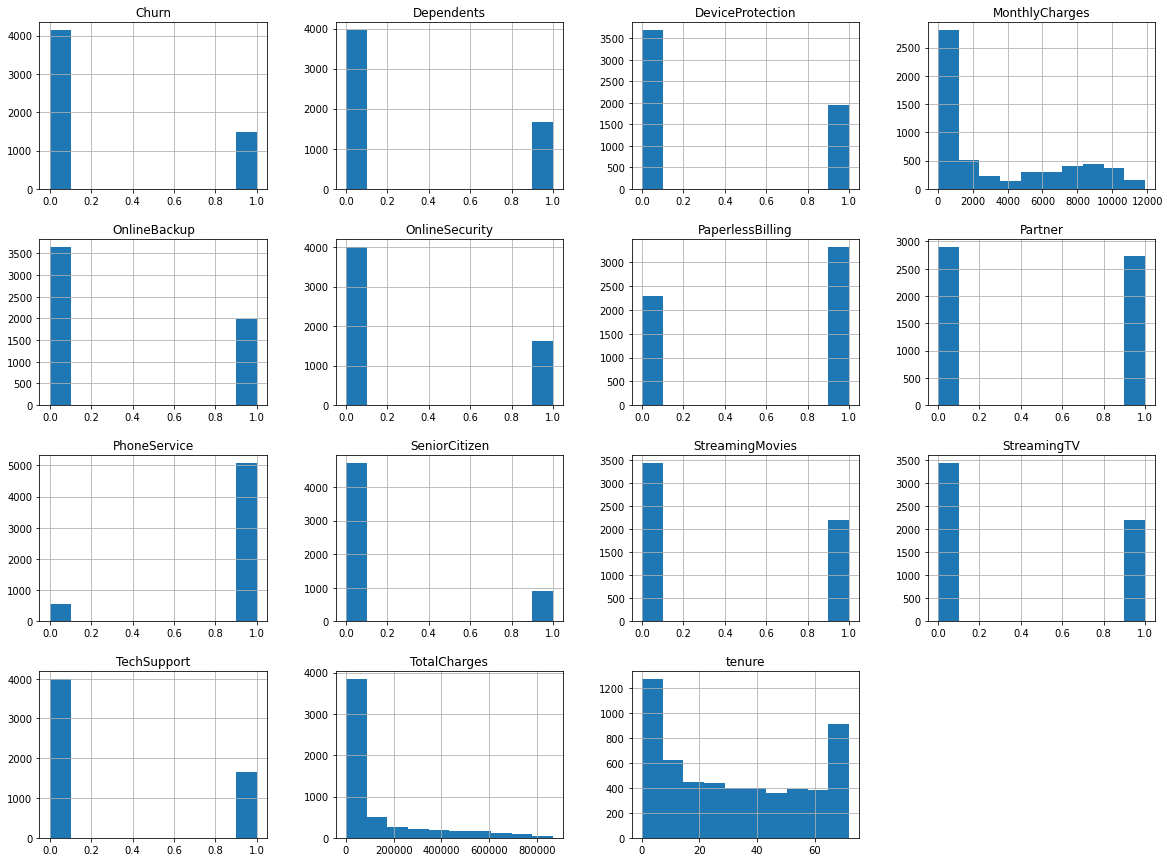

In [ ]:
train.hist(figsize=(20,15))
plt.show()

Berdasarkan hasil visualisasi dapat dilihat distribusi data untuk variabel numerik dengan nilai kontinu tidak simertris atau tidak berdistribusi normal. Selain itu, pada variabel target ('Churn') distribusi data tidak seimbang antara kategori "churn" dan tidak. Distribusi yang tidak seimbang tersebut akan menghasilkan model yang tidak baik.

Untuk menhadapi kondisi data yang tidak seimbang, terdapat sejumlah pendekatan, antara lain:

1. Menggunakan metrik evaluasi yang tepat
2. Mengubah algoritma model yang dibuat
3. Melakukan resampling (menyeimbangkan masing-masing kelas)

Pada latihan ini, kita akan menggunakan 2 pendekatan awal, yaitu: menggunakan metode evaluasi yang tepat (AUC, Presisi, Recall, dan F1-Score) dan menggunakan metode algoritma machine learning yang sesuai untuk data tidak seimbang.

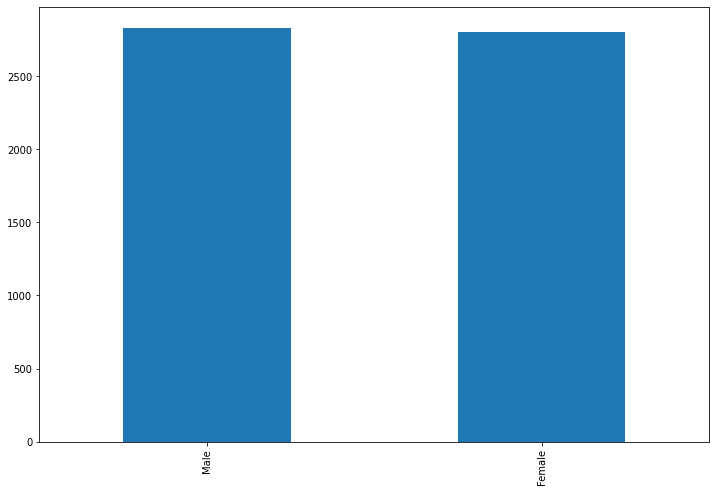

In [ ]:
train['gender'].value_counts().plot(kind = 'bar', figsize=(12,8))
plt.show()

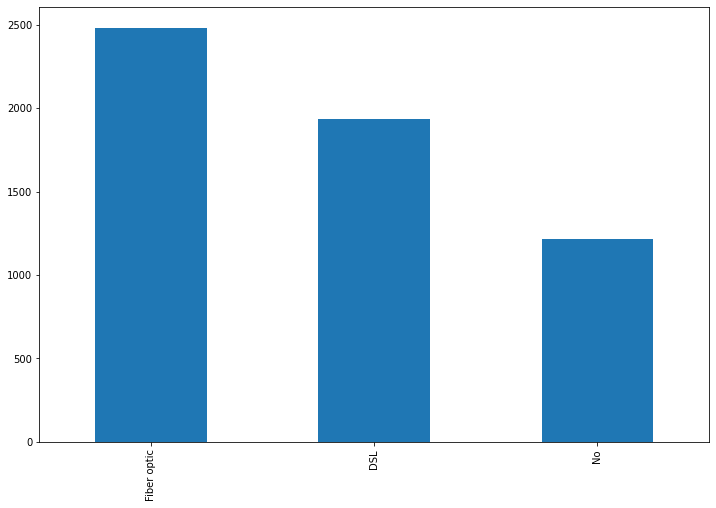

In [ ]:
train['InternetService'].value_counts().plot(kind = 'bar', figsize=(12,8))
plt.show()

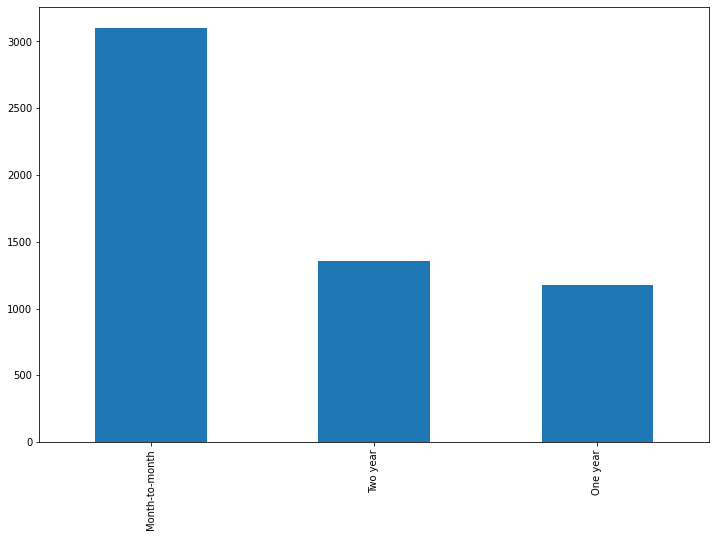

In [ ]:
train['Contract'].value_counts().plot(kind = 'bar', figsize=(12,8))
plt.show()

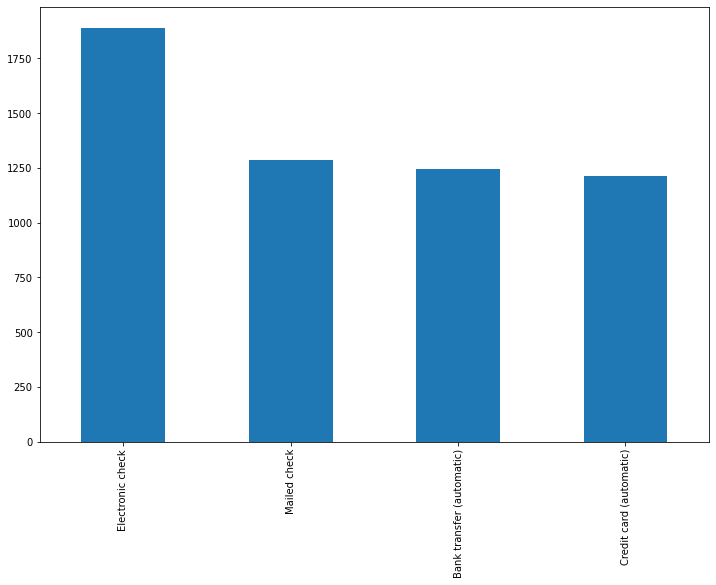

In [ ]:
train['PaymentMethod'].value_counts().plot(kind = 'bar', figsize=(12,8))
plt.show()

### *3.2 Kovarians*

Visualisasi kovarians dapat mengggunakan scatterplot dan boxplot.

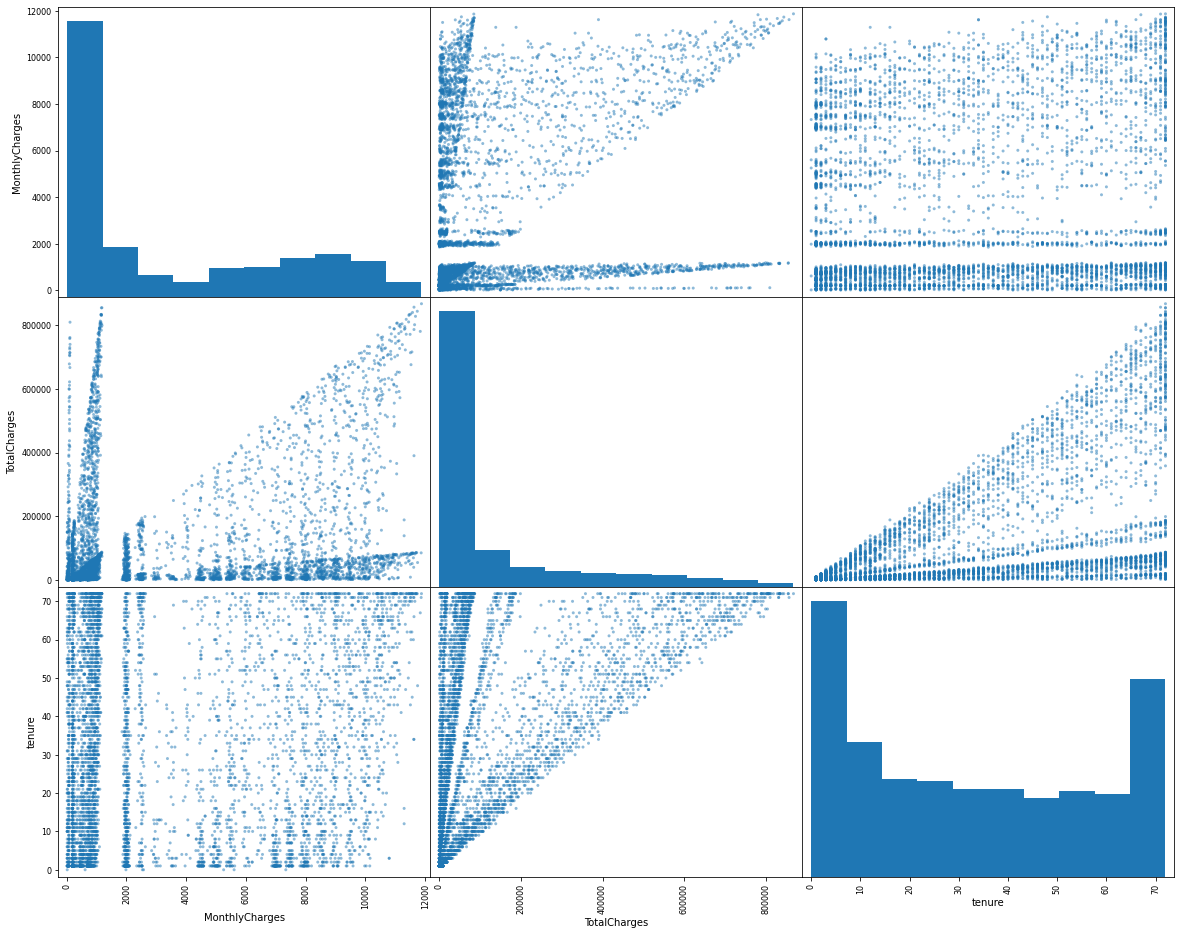

In [ ]:
from pandas.plotting import scatter_matrix

scatter_matrix(train.loc[:,['MonthlyCharges','TotalCharges','tenure']], figsize=(20, 16))

plt.show()

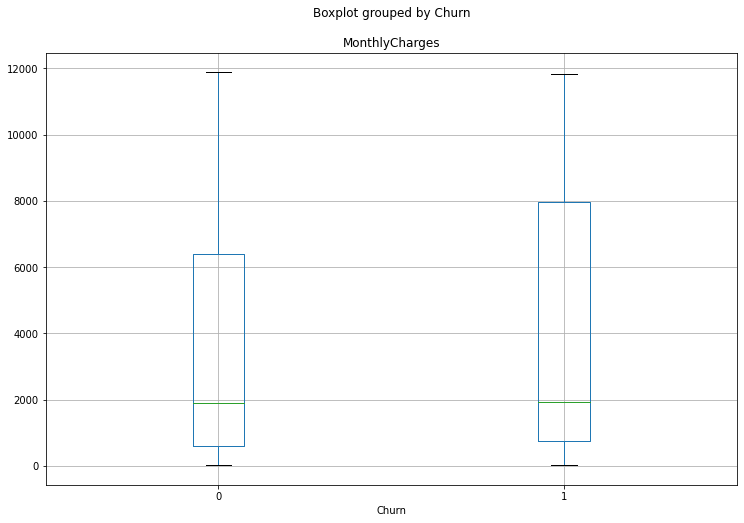

In [ ]:
train.boxplot(column='MonthlyCharges', by = 'Churn', figsize=(12,8))
plt.show()

## **4 Penyiapan Data untuk Machine Learning**

*Data preprocessing* dan *engineering* mengacu pada proses penambahan, penghapusan, atau transformasi data. Waktu yang diperlukan untuk memikirkan identifikasi kebutuhan *data engineering* dapat berlangsung cukup lama dan proprsinya akan menjadi yang terbesar dibandingkan analisa lainnya. Hal ini disebabkan karena kita perlu untuk memahami data apa yang akan kita oleh atau diinputkan ke dalam model.

Untuk menyederhanakan proses *feature engineerinh*, kita harus memikirkannya sebagai sebuah *blueprint* dibanding melakukan tiap tugasnya secara satu persatu. Hal ini membantu kita dalam dua hal:

1. Berpikir secara berurutan
2. Mengaplikasikannya secara tepat selama proses *resampling*

Memikirkan *feature engineering* sebagai sebuah *blueprint* memaksa kita untuk memikirkan urutan langkah-langkah *preprocessing* data. Meskipun setiap masalah mengharuskan kita untuk memikirkan efek *preprocessing* berurutan, ada beberapa saran umum yang harus kita pertimbangkan:

* Jika menggunakan log atau transformasi Box-Cox, jangan memusatkan data terlebih dahulu atau melakukan operasi apa pun yang dapat membuat data menjadi tidak positif. Atau, gunakan transformasi Yeo-Johnson sehingga kita tidak perlu khawatir tentang hal ini.
* *One-hot* atau *dummy encoding* biasanya menghasilkan data jarang (*sparse*) yang dapat digunakan oleh banyak algoritma secara efisien. Jika kita menstandarisasikan data tersebut, kita akan membuat data menjadi padat (*dense*) dan kita kehilangan efisiensi komputasi. Akibatnya, sering kali lebih disukai untuk standardisasi fitur numerik kita dan kemudian *one-hot/dummy endode*.
* Jika kila mengelompokkan kategori (*lumping*) yang jarang terjadi  secara bersamaan, lakukan sebelum *one-hot/dummy endode*.
* Meskipun kita dapat melakukan prosedur pengurangan dimensi pada fitur-fitur kategorikal, adalah umum untuk melakukannya terutama pada fitur numerik ketika melakukannya untuk tujuan feature engineering.

In [ ]:
train_copy = train.copy()
train_labels = train_copy["Churn"].copy()
train_copy = train_copy.drop(["customerID", "Churn"], axis=1)
train_copy

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
3738,Male,0,0,0,35,0,DSL,0,0,1,0,1,1,Month-to-month,0,Electronic check,492,170165.0
3151,Male,0,1,1,15,1,Fiber optic,1,0,0,0,0,0,Month-to-month,0,Mailed check,751,115155.0
4860,Male,0,1,1,13,0,DSL,1,1,0,1,0,0,Two year,0,Mailed check,4055,59035.0
3867,Female,0,1,0,26,1,DSL,0,1,1,0,1,1,Two year,1,Credit card (automatic),735,19057.0
3810,Male,0,1,1,1,1,DSL,0,0,0,0,0,0,Month-to-month,0,Electronic check,4455,4455.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6303,Female,0,1,0,71,1,Fiber optic,0,1,1,1,1,1,Two year,0,Electronic check,10925,77077.0
6227,Male,0,0,0,2,1,DSL,0,0,0,0,0,0,Month-to-month,0,Bank transfer (automatic),4605,8035.0
4673,Female,1,0,0,25,1,Fiber optic,1,1,0,0,1,1,Month-to-month,1,Mailed check,1028,26602.0
2710,Female,0,1,0,24,1,No,0,0,0,0,0,0,One year,0,Credit card (automatic),204,4828.0


Proses penulisan blueprint akan dibantu dengan *custom transformer* yang dibuat menggunakan perintah di bawah ini. Transformer ini menerima input berupa list kolom dari dataframe dan meneruskannya pada tahapan transformasi data selanjutnya. Transformer ini mengurangi proses penulisan nama kolom yang akan masuk ke dalam tahapan transformasi, sehingga kita hanya perlu fokus pada tahapan transformasi apa yang akan dilakukan pada data.

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
  def __init__(self, attribute_names):
    self.attribute_names = attribute_names
  def fit(self, X, y=None):
    return self
  def transform(self, X):
    return X[self.attribute_names].values

Penulisan blueprint/pipeline transformasi pada proses *feature engineering* ditampilkan pada perintah berikut: 

In [ ]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

num_attribs1 = list(train_copy.drop(['MonthlyCharges','TotalCharges','tenure',
                                     'gender','InternetService','Contract',
                                    'PaymentMethod'], axis=1))
num_attribs2 = ['MonthlyCharges','TotalCharges','tenure']
cat_attribs = ['gender','InternetService','Contract','PaymentMethod']

num_pipeline1 = Pipeline([
  ('selector', DataFrameSelector(num_attribs2)),
  ('imputer', KNNImputer()),
  ('std_scaler', StandardScaler())
])

num_pipeline2 = Pipeline([
  ('selector', DataFrameSelector(num_attribs1))
])

cat_pipeline = Pipeline([
  ('selector', DataFrameSelector(cat_attribs)),
  ('imputer', SimpleImputer(strategy="most_frequent")),
  ('onehotencoder', OneHotEncoder(sparse=False))
])

full_pipeline = FeatureUnion(transformer_list=[
  ("num_pipeline1", num_pipeline1),
  ("num_pipeline2", num_pipeline2),
  ("cat_pipeline", cat_pipeline)
])

Menerapkan blueprint pada data training.

In [ ]:
train_prepared = full_pipeline.fit_transform(train_copy)
train_prepared

array([[-0.83484466,  0.22218961,  0.10237124, ...,  0.        ,
         1.        ,  0.        ],
       [-0.76369101, -0.06292399, -0.71174346, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.14399886, -0.35379065, -0.79315493, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.68759231, -0.52188899, -0.30468611, ...,  0.        ,
         0.        ,  1.        ],
       [-0.91396533, -0.63474235, -0.34539184, ...,  1.        ,
         0.        ,  0.        ],
       [-0.40270297, -0.65410064, -1.07809507, ...,  0.        ,
         0.        ,  1.        ]])

Untuk mengkonversi array ke dataframe, jalankan sintaks berikut:

In [ ]:
labels = num_attribs2 + num_attribs1 + train_copy['gender'].unique().tolist() + train_copy['InternetService'].unique().tolist() +\
        train_copy['Contract'].unique().tolist() + train_copy['PaymentMethod'].unique().tolist() 
train_df = pd.DataFrame(train_prepared, columns=labels)
train_df

,MonthlyCharges,TotalCharges,tenure,SeniorCitizen,Partner,Dependents,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Male,Female,DSL,Fiber optic,No,Month-to-month,Two year,One year,Electronic check,Mailed check,Credit card (automatic),Bank transfer (automatic)
0,-0.834845,0.222190,0.102371,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.763691,-0.062924,-0.711743,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.143999,-0.353791,-0.793155,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,-0.768087,-0.560994,-0.263980,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.253889,-0.636676,-1.281624,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,2.031356,-0.260280,1.567778,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5630,0.295097,-0.618121,-1.240918,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
5631,-0.687592,-0.521889,-0.304686,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
5632,-0.913965,-0.634742,-0.345392,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


## **5 Training Model**

Terdapat beberapa model yang akan kita coba training untuk melihat model potensial yang dapat digunakan untuk memprediksi `churn`. Model-model klasifikasi yang akan kita coba, antara lain:

1. regresi logistik
2. k-nearest neigbors
3. decision trees
4. random forest
5. gradient boosting

Proses training terdiri dari 4 tahapan:
1. inisiasi objek model
2. fitting data pada model
3. validasi silang
4. perhitungan nilai metrik validasi

Metrik validasi yang digunakan pada model ditampilkan dalam fungsi-berikut:



In [ ]:
# Import Library
import sklearn.metrics as metrics

def display_scores(score):
  print(score)
  print("Mean AUC :", score.mean())
  print("SD AUC :", score.std())

### *5.1 Regresi Logistik*

Regresi logistik merupakan metode statistik yang digunakan untuk melakukan klasifikasi dua buah kelas output. Metode ini merupakan salah satu kasus khusus dari metode regresi linier. Metode ini menggunakan fungsi logit untuk memprediksi dua buah kejadian.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Membuat model
log_class = LogisticRegression()
log_class.fit(train_prepared, train_labels)

# validasi silang
log_scores = cross_val_score(log_class, train_prepared, train_labels,
                         scoring="roc_auc", cv=10)

# nilai rmse validasi silang
display_scores(log_scores)

[0.87441224 0.84938808 0.85458937 0.8478744  0.85129527 0.84690205
 0.84774503 0.82085076 0.82932918 0.8163519 ]
Mean AUC : 0.8438738283661451
SD AUC : 0.016346645348942417


Model yang dihasilkan cukup baik dalam melakukan klasifikasi yang ditunjukkan dari nilai AUC yang tinggi (0.84).

Cara lain untuk membentuk model regresi logistik adalah dengan menggunakan modul `statsmodels`. Model yang terbentuk dapat kita lakukan analisa terkait efek yang dihasilkan dari variabel prediktor terhadap variabel target.

In [ ]:
import statsmodels.api as sm

y = train_labels.reset_index()

logit_model=sm.(y.Churn, train_df)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.414595
         Iterations 9
                                     Results: Logit
Model:                       Logit                    Pseudo R-squared:         0.283    
Dependent Variable:          Churn                    AIC:                      4717.6557
Date:                        2020-09-06 07:31         BIC:                      4870.2969
No. Observations:            5634                     Log-Likelihood:           -2335.8  
Df Model:                    22                       LL-Null:                  -3259.7  
Df Residuals:                5611                     LLR p-value:              0.0000   
Converged:                   1.0000                   Scale:                    1.0000   
No. Iterations:              9.0000                                                      
-----------------------------------------------------------------------------------------
                           Coef.    

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:1286: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


Berdasarkan hasil yang diperoleh terdapat sejumlah variabel yang memiliki efek yang signifikan (p-value < 5%) terhadap potensi Churn dari konsumen ditampilkan pada tabel berikut:

| Variabel            | Koefisien      | 
|:--------------------|:---------------|
| TotalCharges        | 0.1222 |
| tenure              | -0.8142 |
| Dependents          | -0.2342 |
| PhoneService        | -0.3782 |
| OnlineSecurity      |     -0.4051|
| TechSupport          |     -0.3469|
| StreamingTV          |      0.2784 |
| StreamingMovies      |      0.2872 |
| PaperlessBilling      |     0.3787 |

Berdasarkan tabel tersebut, variabel tenure memiliki efek terbesar terhadap potensi churn konsumen. Nilai koefisien variabel tersebut negatif yang menunjukkan efek negatif (semakin lama konsumen menggunakan sebuah layanan, semakin kecil potensi konsumen untuk churn).

### *5.2 K-Nearest Neighbors*

K-nearest Neighbors (KNN) adalah algoritma yang sangat sederhana di mana setiap pengamatan diprediksi berdasarkan "kesamaan" dengan pengamatan lainnya. Tidak seperti kebanyakan metode lainnya, KNN adalah algoritma berbasis memori dan tidak dapat diringkas oleh model bentuk tertutup. Ini berarti sampel pelatihan diperlukan saat run-time dan prediksi dibuat langsung dari hubungan sampel. Akibatnya, KNN juga dikenal sebagai *lazy learners* (Cunningham dan Delany 2007) dan dapat menjadi tidak efisien secara komputasi. Namun, KNN telah berhasil dalam sejumlah besar masalah bisnis (Jiang et al. (2012) dan Mccord dan Chuah (2011)) dan berguna untuk tujuan preprocessing juga.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# membuat model
nn_class = KNeighborsClassifier()
nn_class.fit(train_prepared, train_labels)

# validasi silang
nn_scores = cross_val_score(nn_class, train_prepared, train_labels,
                         scoring="roc_auc", cv=10)

# nilai rmse validasi silang
display_scores(nn_scores)

[0.83011272 0.7692351  0.76208535 0.7644525  0.78889051 0.77828843
 0.77585676 0.76475213 0.77212009 0.7423406 ]
Mean AUC : 0.7748134186292802
SD AUC : 0.021754952087532198


### *5.3 Decision Trees*

*Tree-based models* adalah kelas algoritma nonparametrik yang bekerja dengan mempartisi ruang fitur ke sejumlah daerah yang lebih kecil (tidak tumpang tindih) dengan nilai respons yang sama menggunakan seperangkat *aturan pemisahan*. Prediksi diperoleh dengan memasang model yang lebih sederhana (misal: Konstanta seperti nilai respons rata-rata) di setiap wilayah. Metode membagi dan menaklukkan seperti itu dapat menghasilkan aturan sederhana yang mudah ditafsirkan dan divisualisasikan dengan diagram pohon. 

Ada banyak metode yang dapat digunakan membangun pohon regresi, tetapi salah satu yang tertua dikenal sebagai pendekatan pohon klasifikasi dan regresi (CART) yang dikembangkan oleh [Breiman et al. (1984)](https://www.amazon.com/Classification-Regression-Wadsworth-Statistics-Probability/dp/0412048418). Tutorial ini berfokus pada bagian regresi CART. Pohon regresi dasar mempartisi data yang ditetapkan ke dalam subkelompok yang lebih kecil dan kemudian melakukan fitting konstanta sederhana untuk setiap pengamatan dalam subkelompok. Partisi dicapai dengan partisi biner berturut-turut (alias partisi rekursif) berdasarkan pada berbagai prediktor. Konstanta untuk memprediksi didasarkan pada nilai respons rata-rata untuk semua pengamatan yang termasuk dalam subkelompok tersebut.

Sebagai contoh, misalkan kita ingin memprediksi mil per galon mobil rata-rata berdasarkan ukuran silinder (`cyl`) dan tenaga kuda (`hp`). Semua pengamatan melalui pohon ini, dinilai pada simpul tertentu, dan lanjutkan ke kiri jika jawabannya "ya" atau lanjutkan ke kanan jika jawabannya "tidak". Jadi, pertama, semua pengamatan yang memiliki 6 atau 8 silinder pergi ke cabang kiri, semua pengamatan lainnya dilanjutkan ke cabang kanan. Selanjutnya, cabang kiri selanjutnya dipartisi oleh tenaga kuda. Pengamatan 6 atau 8 silinder dengan tenaga kuda yang sama atau lebih besar dari 192 dilanjutkan ke cabang kiri; mereka yang kurang dari 192 hp melanjutkan ke kanan. Cabang-cabang ini mengarah ke *terminal node* atau *leaf nodes* yang berisi nilai respons prediksi kita. Pada dasarnya, semua pengamatan (mobil dalam contoh ini) yang tidak memiliki 6 atau 8 silinder (cabang paling kanan) rata-rata 27 mpg. Semua pengamatan yang memiliki 6 atau 8 silinder dan memiliki lebih dari 192 hp (cabang paling kiri) rata-rata 13 mpg.

![Prediksi mpg berdasarkan variabel cyl dan hp (Sumber: <http://uc-r.github.io/>)](http://uc-r.github.io/public/images/analytics/regression_trees/ex_regression_tree.png)

Contoh sederhana tersebut dapat kita generalisasikan. Variabel respon kontinu $Y$ dan dua buah variabel input $X_1$ dan $X_2$. Partisi rekursif menghasilkan tiga buah area (*nodes*), yaitu: $R_1$, $R_2$, dan $R_3$ dimana model memprediksi $Y$ dengan sebuah konstanta $c_m$ pada area $R_m$:

$$
\hat{f}\left(X\right) = \sum_{m=1}^{3} c_{m} I\left(X_1,X_2\right) \in R_m
$$

#### Menentukan Split pada Decision Tree

Pertama, penting untuk mewujudkan partisi variabel yang dilakukan secara *top-down*. Ini hanya berarti bahwa partisi yang dilakukan sebelumnya pada pohon yang terbentuk tidak akan berubah oleh partisi selanjutnya. Tetapi bagaimana partisi ini dibuat? Model dimulai dengan seluruh data,$S$, dan mencari setiap nilai berbeda dari setiap variabel input untuk menemukan prediktor dan nilai *split* yang membagi data menjadi dua area ($R_1$ dan $R_2$) sedemikian rupa sehingga jumlah kesalahan kuadrat keseluruhan diminimalkan:

$$
minimize {SSE = \sum_{i \in R_1}^{ } \left(y_i-c_1\right)^2 +  \sum_{i \in R_2}^{ } \left(y_i-c_2\right)^2}
$$

Setelah menemukan  *split* terbaik, kita mempartisi data menjadi dua area yang dihasilkan dan mengulangi proses *split* pada masing-masing dua area Proses ini berlanjut sampai kriteria penghentian tercapai. Pohon yang dihasilkan biasanya sangat dalam, kompleks yang dapat menghasilkan prediksi yang baik pada data *training*, tetapi kemungkinan besar model yang dibuat *overfiting* dan akan menghasilkan hasil prediksi yang buruk pada data *test*.

#### Cost complexity criterion

Seringkali ada keseimbangan yang harus dicapai dalam kedalaman dan kompleksitas pohon untuk mengoptimalkan kinerja prediksi pada beberapa data yang tidak terlihat. Untuk menemukan keseimbangan ini, kita biasanya menumbuhkan pohon yang sangat besar seperti yang didefinisikan pada bagian sebelumnya dan kemudian memangkasnya kembali untuk menemukan sub-pohon yang optimal. Kita menemukan sub-pohon optimal dengan menggunakan parameter kompleksitas biaya ($\alpha$) yang memberikan penalti pada fungsi objektif pada persamaan penentuan *split* untuk setiap *terminal nodes* pada tiap pohon ($T$).

$$
minimize  {SSE+\alpha\left|T\right| }
$$

Untuk nilai $alpha$ yang diberikan, kita dapat menemukan pohon pemangkasan terkecil yang memiliki kesalahan penalti terendah. Jika kita terbiasa dengan regresi dengan penalti, kita akan menyadari hubungan dekat dengan penalti norma lasso $L_1$. Seperti dengan metode regularisasi ini, penalti yang lebih kecil cenderung menghasilkan model yang lebih kompleks dan menghasilkan pohon yang lebih besar. Sedangkan penalti yang lebih besar menghasilkan pohon yang jauh lebih kecil. Akibatnya, ketika pohon tumbuh lebih besar, pengurangan SSE harus lebih besar daripada penalti kompleksitas biaya. Biasanya, kita mengevaluasi beberapa model melintasi spektrum $\alpha$ dan menggunakan teknik validasi silang untuk mengidentifikasi $\alpha$ optimal dan sub-pohon optimal.

#### Kelebihan dan Kekurangan

Terdapat sejumlah kelebihan penggunaan *decision trees*, antara lain:

* Mudah ditafsirkan.
* Dapat membuat prediksi cepat (tidak ada perhitungan rumit, hanya mencari konstanta di pohon).
* Sangat mudah untuk memahami variabel apa yang penting dalam membuat prediksi. Node internal (splits) adalah variabel-variabel yang sebagian besar mereduksi SSE.
* Jika ada beberapa data yang hilang, kita mungkin tidak bisa pergi jauh-jauh ke bawah pohon menuju daun, tetapi kita masih bisa membuat prediksi dengan merata-rata semua daun di sub-pohon yang kita jangkau.
* Model ini memberikan respons “bergerigi” non-linier, sehingga dapat bekerja saat permukaan regresi yang sebenarnya tidak mulus. Jika halus, permukaan konstan-piecewise dapat memperkirakannya secara dekat (dengan cukup daun).
* Ada algoritma yang cepat dan andal untuk mempelajari pohon-pohon ini.

Selain kelebihan, terdapat kekurangan dalam penggunaan *decision trees*, antara lain:

* Pohon regresi tunggal memiliki varian yang tinggi, menghasilkan prediksi yang tidak stabil (subsampel alternatif dari data *training* dapat secara signifikan mengubah node terminal).
* Karena varians tinggi pohon regresi tunggal memiliki akurasi prediksi yang buruk.




In [ ]:
from sklearn.tree import DecisionTreeClassifier

# membuat model
dt_class = DecisionTreeClassifier()
dt_class.fit(train_prepared, train_labels)

# validasi silang
dt_scores = cross_val_score(dt_class, train_prepared, train_labels,
                         scoring="roc_auc", cv=10)

# nilai rmse validasi silang
display_scores(dt_scores)

[0.65732689 0.62724638 0.65338164 0.67032206 0.67096262 0.68364783
 0.66821483 0.65566741 0.62276692 0.67163035]
Mean AUC : 0.6581166924775655
SD AUC : 0.01866023985485719


Diagram pohon yang dihasilkan model selanjutnya dapat kita visualisasikan.

In [ ]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(dt_class, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                class_names=['Not Churn', 'Churn'],
                feature_names= labels)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

### *5.4 Ringkasan Model* 

Setelah training data dilakukan, berikut adalah metrik evaluasi dari masing-masing model yang terbentuk.

|Model  | AUC     |
|:------|:--------|
| Regresi Logistik | 0.8438738283661451|
| K-Nearest Neighbors | 0.7748134186292802 |
| Decision Tress | 0.6581166924775655|

Berdasarkan hasil yang diperoleh, terdapat sebuah model potensial yang dapat kita pilih untuk proses lanjutan, yaitu: regresi logistik. 

## **6 Parameter Tuning**

Setelah model terpilih, model tersebut perlu dilakukan *tuning* untuk memperoleh parameter optimal pada model. Terdapat dua buah metode pencarian parameter optimal pada model, antara lain:

1. Grid Search
2. Randomized Search

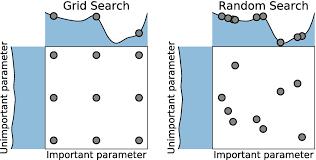



Pada contoh kali ini, kita akan melakukan parameter tuning menggunakan metode Grid Search.

In [ ]:
from sklearn.model_selection import GridSearchCV

import decimal

def float_range(start, stop, step):
  while start < stop:
    yield float(start)
    start += decimal.Decimal(step)

param_grid = [{
    'l1_ratio' : list(float_range(0,1,'0.1'))
}]

log_class = LogisticRegression(solver='saga', penalty='elasticnet')

grid_search = GridSearchCV(log_class, param_grid, cv=5,
  scoring='roc_auc',
  return_train_score=True)

grid_search.fit(train_prepared, train_labels)

In [ ]:
grid_search.best_estimator_

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=0.3, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='elasticnet',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
  print(mean_score, params)

0.8439069798482622 {'l1_ratio': 0.0}
0.8438924288555019 {'l1_ratio': 0.1}
0.8439085789335972 {'l1_ratio': 0.2}
0.8439182779673725 {'l1_ratio': 0.3}
0.8439029279203641 {'l1_ratio': 0.4}
0.843903727951451 {'l1_ratio': 0.5}
0.8439069544504498 {'l1_ratio': 0.6}
0.8439069603114835 {'l1_ratio': 0.7}
0.8439109936794417 {'l1_ratio': 0.8}
0.8438972436946072 {'l1_ratio': 0.9}


## **7 Analisis Model Terbaik dan Error Prediksinya**

Analisis variabel penting model dapat kita lakukan menggunakan analisis koefisien dari model regresi logistik.

In [ ]:
logit_model=sm.Logit(y.Churn, train_df)
result=logit_model.fit_regularized(method='l1', alpha=0.3)
print(result.summary2())

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.4151028524151943
            Iterations: 337
            Function evaluations: 337
            Gradient evaluations: 337
                                     Results: Logit
Model:                       Logit                    Pseudo R-squared:         0.283    
Dependent Variable:          Churn                    AIC:                      4719.6709
Date:                        2020-09-06 08:54         BIC:                      4878.9487
No. Observations:            5634                     Log-Likelihood:           -2335.8  
Df Model:                    23                       LL-Null:                  -3259.7  
Df Residuals:                5610                     LLR p-value:              0.0000   
Converged:                   1.0000                   Scale:                    1.0000   
No. Iterations:              337.0000                                                    
--------------

/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


Berdasarkan hasil regularisasi, terdapat sejumlah variabel yang memiliki koefisien yang signifikan.

|Variabel | Koefisien |
|:--------|:----------|
| TotalCharges      |         0.1210|
| tenure            |        -0.8117 |
| Dependents         |       -0.2321  |
| PhoneService       |       -0.3827   |    
|OnlineSecurity       |     -0.4045|
|TechSupport        |       -0.3462       
| StreamingTV        |        0.2759       
|StreamingMovies       |     0.2843       
|PaperlessBilling      |     0.3752  
|DSL                  |     -0.9573 
|No                   |     -1.8057 
|Two year             |     -0.7275      
|One year              |    -1.3825   

Analisis terakhir yang dapat kita lakukan adalah menganilisa error model dengan menggunakan data test.

In [ ]:
final_model = grid_search.best_estimator_
X_test = test.drop(['customerID', 'Churn'], axis=1)
y_test = test["Churn"].copy()
X_test_prepared = full_pipeline.transform(X_test)

In [ ]:
import sklearn.metrics as metrics

final_predictions = final_model.predict(X_test_prepared)
print("Akurasi", metrics.accuracy_score(y_test,final_predictions))
print("Presisi", metrics.precision_score(y_test,final_predictions))
print("Recall", metrics.recall_score(y_test,final_predictions))
print("F1-Score", metrics.f1_score(y_test,final_predictions))

Akurasi 0.794180269694819
Presisi 0.63125
Recall 0.5401069518716578
F1-Score 0.5821325648414986


Kita dapat pula melakukan visualisasi kurva ROC dari model tersebut.

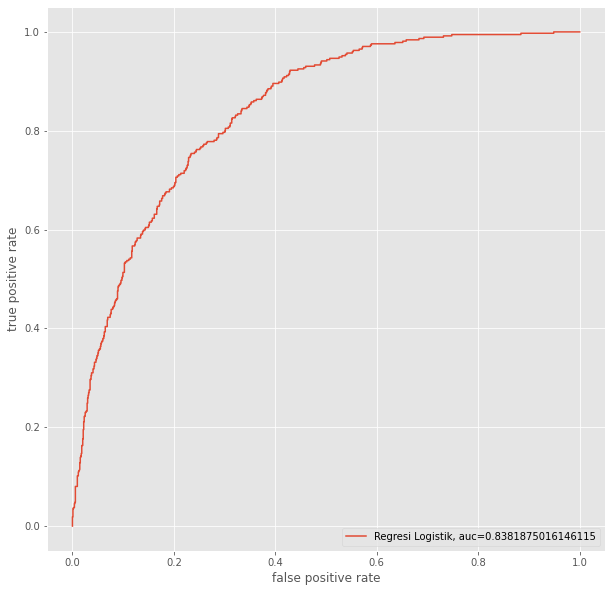

In [ ]:
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('ggplot')

# Visualize ROC Curve
target_predicted = final_model.predict_proba(X_test_prepared)[::,1]
fp_rate, tp_rate, _ = metrics.roc_curve(y_test,  target_predicted)
auc = metrics.roc_auc_score(y_test, target_predicted)
plt.plot(fp_rate, tp_rate, label="Regresi Logistik, auc="+str(auc))
plt.xlabel('false positive rate') 
plt.ylabel('true positive rate')
plt.legend(loc=4)
plt.show()

## **8 Menyimpan Model dan Membuat Prediksi pada Data Baru**

Pipeline penyiapan data untuk model dan model yang telah dilatih selanjutnya dapat disimpan agar dapat digunakan kembali atau dideploy sebagai web service.

In [ ]:
import pickle

with open("model.pkl", 'wb') as file:
    pickle.dump(final_model, file)
with open("pipeline.pkl", 'wb') as file:
    pickle.dump(full_pipeline, file)


Untuk memuat model dan pipeline yang telah disimpan, jalankan perintah berikut:

In [ ]:
# Load model and pipeline
with open("model.pkl", 'rb') as file:
    model = pickle.load(file)

with open("pipeline.pkl", 'rb') as file:
    pipeline = pickle.load(file)
    


Lakukan transformasi terhadap data yang akan diprediksi hasilnya.

In [ ]:
predictor = data.drop("median_house_value", axis=1)

data_prepared = full_pipeline.fit_transform(predictor)

Inputkan data yang telah ditransformasi ke dalam model.

In [ ]:
pred = model.predict(data_prepared)
pred

array([417257.5       , 366100.        , 430250.35714286, ...,
        88042.85714286,  89671.42857143, 119778.57142857])

#**B. Model Prediktif - Regresi**

![](https://lh3.googleusercontent.com/proxy/WJdQU-ybhq8tAy_QxhSTZYOScXVAWQ4LQZORV1_8BADrdra89fZ_FhCEy5767FgNaHUmq625ouiHcWXzdQE3JtrLSwlNMxH_4Pf0EFfxSH9m90-dWUeCBdQXh4P1Ig)

Pada tutorial ini, kita akan belajar untuk membuat sebuah model prediktif menggunakan python. Adapun tahapan pembuatan model prediktif yang akan dibahas pada tutorial kali ini antara lain:

1. Pemahaman masalah
2. Import data
3. Analisis data eksploratif
4. Penyiapan data untuk machine learning
5. Training model
6. Parameter tuning model terpilih
7. Analisis Model Terbaik dan Error Prediksinya
8. Menyimpan model

In [ ]:
!pip3 install pandas
!pip3 install numpy
!pip3 install sklearn
!pip3 install matplotlib
!pip3 install scipy

## **1 Pemahaman Masalah**

Pada tutorial kali ini, kita akan membuat sebuah model prediktif untuk memprediksi memprediksi median harga rumah (*median housing price*) dari dataset **Calirfornia Housing Price** yang diambil dari repositori **Statlib**. Dataset ini didasarkan pada data sensus tahun 1990 di California. Model yang dibuat diharapkan akan membantu investor yang menjasi inverstor kita untuk menentukan apakah layak berinvestasi di suatu kawasan berdasarkan nilai harga median hunia yang ada di kawasan tersebut.

Dataset yayng digunakan memiliki sejumlah variabel yang diukur selama sensus, seperti: jumlah populasi, median pendapatan penduduk, median harga hunian, dan seterusnya untuk setiap blok kawasan yang ada di California. Blok kawasan merupakan unit pengelompokan terkecil yang digunakan oleh lembaga sensus saat itu (blok kawasan setidaknya memiliki populasi 600 sampai dengan 3000 orang). Untuk singkatnya kita sebut blok kawasan tersebut sebagai distrik.

## **2 Import Data**

Dataset yang digunakan, akan diambil dari repository pada tautan [berikut]( https://github.com/ageron/handson-ml). Untuk membaca dataset tersebut, kita akan menggunakan fungsi `read_csv` dari modul `Pandas`.

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv')

### *2.1 Cek Dataset*

Hal pertama yang perlu kita cek adalah 5 observasi teratas dan terbawah.

In [ ]:
# cek 5 observasi teratas
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
# cek 5 observasi terbawah
data.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


Setiap baris pada data merepresentasikan sebuah distrik. Terdapat 10 kolom pada dataset tersebut, antara lain: `longitude`, `latitude`, `housing_median_age`, `total_rooms`, `total_bedrooms`, `population`, `households`, `median_income`, `median_house_value`, dan `ocean_proximity`.

Selanjutnya kita dapat menggunakan method `info` untuk memperoleh ringkasan singkat terkait dataset tersebut. Method tersebut akan menampilkan  ringkasan data, seperti: jumlah baris dan kolom, serta nama kolom dan jenis data masing-masing kolom.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Berdasarkan output yang dihasilkan, seluruh kolom mempunyai tipe data numerik, kecuali kolom `ocean_proximity` yang berupa kategori. Untuk melihat jumlah observasi pada masing-masing kelas kolom tersebut, jalankan perintah berikut:

In [ ]:
data['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

Untuk melihat ringkasan data variabel numerik, jalankan perintah berikut:

In [ ]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


### *2.3 Data Splitting*

Sebelum melangkah lebih jauh alangkah baiknya dataset yang telah kita miliki dipisah menjadi dataset `training` (untuk melatih model) dan dataset `test` (untuk mengevaluasi model). 

Terdapat dua buah jenis sampling pada tahapan *data splitting*, yaitu:

1. *random sampling* : sampling acak tanpa mempertimbangkan adanya strata dalam data
2. *startified random sampling* : sampling dengan memperhatikan strata dalam sebuah variabel.

Dalam proses pembentukan model kali ini, kita akan menggunakan metode kedua dengan tujuan untuk memperoleh distribusi yang seragam dari variabel target (`median_house_value`). Untuk melakukannya, terdapat beberapa tahapan yang perlu dilakukan, antara lain:

1. Binning variabel target
2. Membuat objek kelas untuk melakukan sampling
3. Aplikasi metode kelas pada masing-masing dataset

In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit

In [ ]:
data["median_house_cat"] = np.ceil(data["median_house_value"] / 100000)
data["median_house_cat"].where(data["median_house_cat"] < 5, 5.0, inplace=True)
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,median_house_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,4.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,4.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,4.0
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,1.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,1.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,1.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,1.0


Lakukan *stratified sampling* berdasarkan kolom baru yang telah terbentuk.

In [ ]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data, data["median_house_cat"]):
  train = data.loc[train_index]
  test = data.loc[test_index]

Setelah proses sampling telah berhasil dilakukan, buang kolom `income_cat`.

In [ ]:
for set in (train, test):
  set.drop(["median_house_cat"], axis=1, inplace=True)

## **3 Analisis Data Eksploratif**

Analsiis data eksploratif (EDA) ditujukan untuk mengenali data sebelum kita menentukan algoritma yang cocok digunakan untuk menganalisa data lebih lanjut. EDA merupakan sebuah proses iteratif yang secara garis besar menjawab beberapa pertanyaan umum, seperti:

1. Bagaimana distribusi data pada masing-masing variabel?
2. Apakah terdapat asosiasi atau hubungan antar variabel dalam data?

### *3.1 Visualisasi Varians*

Varians dapat divisualisasikan menggunakan histogram (untuk data numerik) dan barplot (untuk data kategorikal).

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

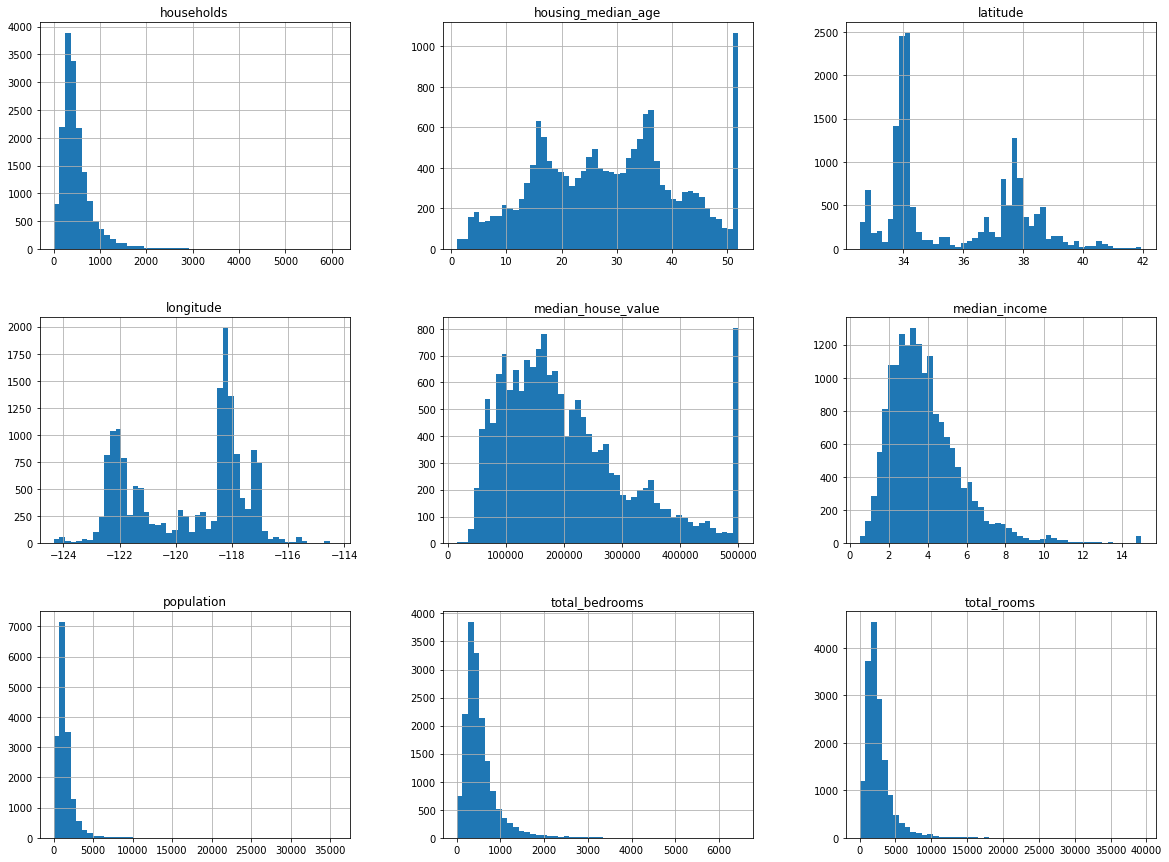

In [ ]:
train.hist(bins=50, figsize=(20,15))
plt.show()

Berdasarkan hasil visualisasi terdapat beberapa poin yang dapat dijelaskan:

1. Distribusi seluruh variabel numerik tidak normal dan cenderung memiliki skewness positif.
2. Variabel `median_house_value` dan `housing_median_age` memiliki batas nilai. Sebagai contoh pada variabel `median_house_values`, hunian dengan nilai > 500.000 akan dibuat nilainya menjadi 500.000 untuk mencegah outlier. Hal ini akan menjadi masalah saat kita melakukan training model karena nilai yang dihasilkan model nantinya tidak dapat melakukan prediksi yang baik lebih dari nilai tersebut. Terdapat beberapa cara untuk mengatasi masalah tersebut, antara lain:

    *   Memcari data baru terkait nilai yang sebenarnya
    *   Membuang baris dengan nilai tersebut.

3. Sejumlah variabel memiliki skala pengukuran yang berbeda-beda. Ini menjadi masalah ketika kita ingin melatih sejumlah model parametrik dan model berbasiskan jarak antar observasi. Variabel dengan skala yang besar akan memberikan efek lebih besar pada output model dibanding variabel dengan skala yang lebih kecil.

Untuk keperluan pembelajaran, kita tidak akan membuang baris observasi pada tahapan ini. Data akan dibiarkan apa adanya untuk keperluan pembelajaran. Namun sejumlah data akan mengalami modifikasi pada tahapan *feature engineering* untuk mengoptimalkan proses pembentukan model.





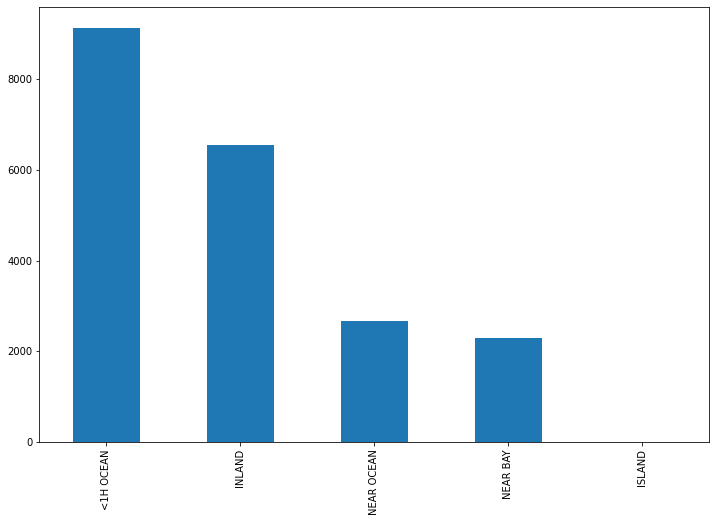

In [ ]:
data['ocean_proximity'].value_counts().plot(kind = 'bar', figsize=(12,8))
plt.show()

### *3.2 Visualisasi Kovarians*

Visualisasi kovarian dapat dilakukan menggunakan scatterplot (numerik vs numerik) atau menggunakan boxplot (numerik vs kategorikal).

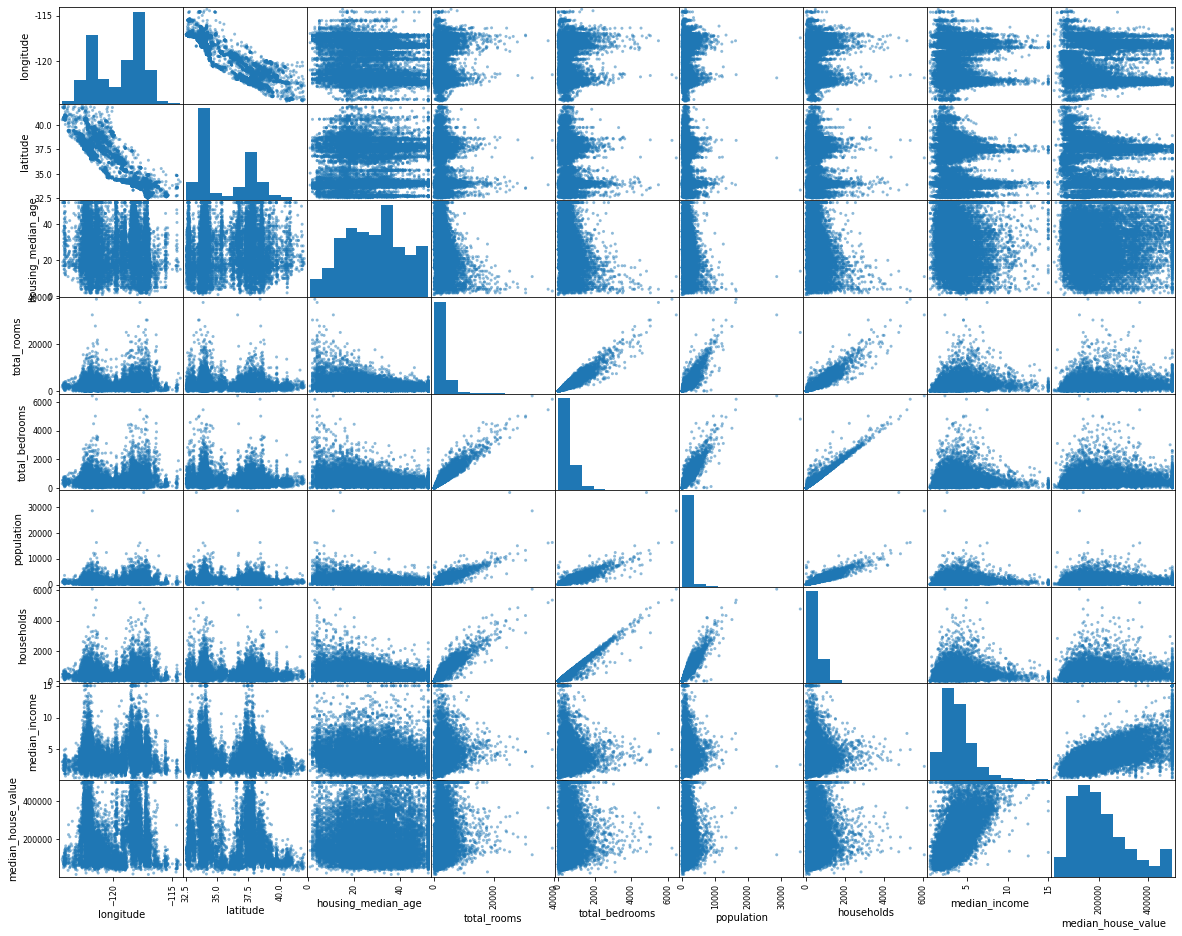

In [ ]:
from pandas.plotting import scatter_matrix

scatter_matrix(train, figsize=(20, 16))

plt.show()

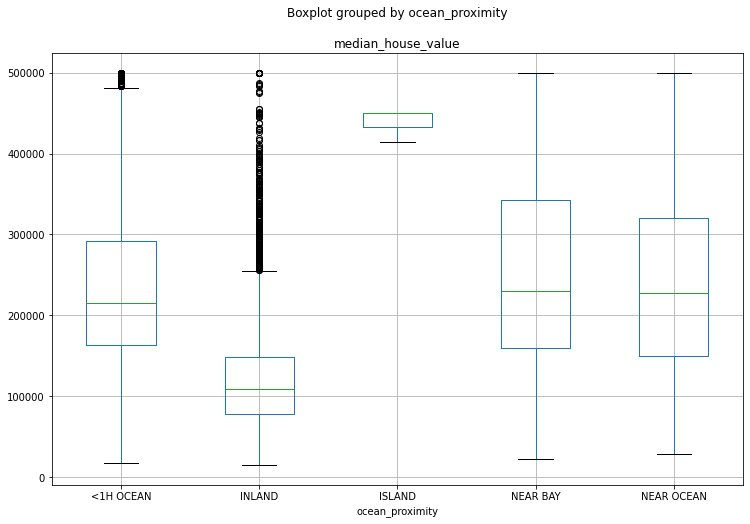

In [ ]:
train.boxplot(column='median_house_value', by = 'ocean_proximity', figsize=(12,8))
plt.show()

## **4 Penyiapan Data untuk Machine Learning**

*Data preprocessing* dan *engineering* mengacu pada proses penambahan, penghapusan, atau transformasi data. Waktu yang diperlukan untuk memikirkan identifikasi kebutuhan *data engineering* dapat berlangsung cukup lama dan proprsinya akan menjadi yang terbesar dibandingkan analisa lainnya. Hal ini disebabkan karena kita perlu untuk memahami data apa yang akan kita oleh atau diinputkan ke dalam model.

Untuk menyederhanakan proses *feature engineerinh*, kita harus memikirkannya sebagai sebuah *blueprint* dibanding melakukan tiap tugasnya secara satu persatu. Hal ini membantu kita dalam dua hal:

1. Berpikir secara berurutan
2. Mengaplikasikannya secara tepat selama proses *resampling*

Memikirkan *feature engineering* sebagai sebuah *blueprint* memaksa kita untuk memikirkan urutan langkah-langkah *preprocessing* data. Meskipun setiap masalah mengharuskan kita untuk memikirkan efek *preprocessing* berurutan, ada beberapa saran umum yang harus kita pertimbangkan:

* Jika menggunakan log atau transformasi Box-Cox, jangan memusatkan data terlebih dahulu atau melakukan operasi apa pun yang dapat membuat data menjadi tidak positif. Atau, gunakan transformasi Yeo-Johnson sehingga kita tidak perlu khawatir tentang hal ini.
* *One-hot* atau *dummy encoding* biasanya menghasilkan data jarang (*sparse*) yang dapat digunakan oleh banyak algoritma secara efisien. Jika kita menstandarisasikan data tersebut, kita akan membuat data menjadi padat (*dense*) dan kita kehilangan efisiensi komputasi. Akibatnya, sering kali lebih disukai untuk standardisasi fitur numerik kita dan kemudian *one-hot/dummy endode*.
* Jika kila mengelompokkan kategori (*lumping*) yang jarang terjadi  secara bersamaan, lakukan sebelum *one-hot/dummy endode*.
* Meskipun kita dapat melakukan prosedur pengurangan dimensi pada fitur-fitur kategorikal, adalah umum untuk melakukannya terutama pada fitur numerik ketika melakukannya untuk tujuan feature engineering.

In [ ]:
train_copy = train.copy()
train_labels = train_copy["median_house_value"].copy()
train_copy = train_copy.drop("median_house_value", axis=1)
train_copy

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
1862,-124.15,41.81,17.0,3276.0,628.0,3546.0,585.0,2.2868,NEAR OCEAN
18832,-122.92,41.70,23.0,4017.0,792.0,1634.0,619.0,2.3571,INLAND
2488,-120.35,36.14,9.0,2671.0,647.0,1484.0,541.0,1.7075,INLAND
7637,-118.29,33.82,21.0,4383.0,901.0,2689.0,913.0,3.4375,<1H OCEAN
6941,-118.10,33.99,31.0,965.0,217.0,599.0,206.0,2.7202,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
18768,-122.24,40.51,23.0,2216.0,378.0,1006.0,338.0,4.5590,INLAND
5066,-118.30,33.99,44.0,1458.0,326.0,1159.0,283.0,1.1645,<1H OCEAN
4004,-118.61,34.15,32.0,4491.0,815.0,1696.0,749.0,4.9102,<1H OCEAN
19318,-123.02,38.46,52.0,2154.0,499.0,524.0,259.0,2.0556,NEAR OCEAN


Proses penulisan blueprint akan dibantu dengan *custom transformer* yang dibuat menggunakan perintah di bawah ini. Transformer ini menerima input berupa list kolom dari dataframe dan meneruskannya pada tahapan transformasi data selanjutnya. Transformer ini mengurangi proses penulisan nama kolom yang akan masuk ke dalam tahapan transformasi, sehingga kita hanya perlu fokus pada tahapan transformasi apa yang akan dilakukan pada data.

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
  def __init__(self, attribute_names):
    self.attribute_names = attribute_names
  def fit(self, X, y=None):
    return self
  def transform(self, X):
    return X[self.attribute_names].values

Penulisan blueprint/pipeline transformasi pada proses *feature engineering* ditampilkan pada perintah berikut: 

In [ ]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

num_attribs = list(train_copy.drop("ocean_proximity", axis=1))
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([
  ('selector', DataFrameSelector(num_attribs)),
  ('imputer', KNNImputer()),
  ('std_scaler', StandardScaler())
])

cat_pipeline = Pipeline([
  ('selector', DataFrameSelector(cat_attribs)),
  ('imputer', SimpleImputer(strategy="most_frequent")),
  ('onehotencoder', OneHotEncoder(sparse = False))
])

full_pipeline = FeatureUnion(transformer_list=[
  ("num_pipeline", num_pipeline),
  ("cat_pipeline", cat_pipeline)
])

Menerapkan blueprint pada data training.

In [ ]:
train_prepared = full_pipeline.fit_transform(train_copy)
train_prepared

array([[-2.2813647 ,  2.88761852, -0.92730526, ...,  0.        ,
         0.        ,  1.        ],
       [-1.66841867,  2.83618177, -0.45044749, ...,  0.        ,
         0.        ,  0.        ],
       [-0.3877103 ,  0.23628785, -1.56311561, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.47938409, -0.69424972,  0.26483915, ...,  0.        ,
         0.        ,  0.        ],
       [-1.71825168,  1.32113568,  1.85436503, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.21691264, -1.26940611, -1.00678155, ...,  0.        ,
         0.        ,  0.        ]])

In [ ]:
train_prepared.shape

(16512, 13)

Terkadang kita juga ingin memperoleh hasil transformasi dalam bentuk dataframe. Untuk melakukannya, jalankan perintah berikut:

In [ ]:
labels = num_attribs + train['ocean_proximity'].unique().tolist()

train_df = pd.DataFrame(train_prepared, columns=labels)
train_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,NEAR OCEAN,INLAND,<1H OCEAN,NEAR BAY,ISLAND
0,-2.281365,2.887619,-0.927305,0.292908,0.213835,1.856885,0.224303,-0.830593,0.0,0.0,0.0,0.0,1.0
1,-1.668419,2.836182,-0.450447,0.633004,0.604195,0.181753,0.313571,-0.793651,0.0,1.0,0.0,0.0,0.0
2,-0.387710,0.236288,-1.563116,0.015231,0.259059,0.050336,0.108780,-1.135007,0.0,1.0,0.0,0.0,0.0
3,0.638850,-0.848560,-0.609400,0.800987,0.863642,1.106054,1.085476,-0.225916,1.0,0.0,0.0,0.0,0.0
4,0.733532,-0.769067,0.185363,-0.767771,-0.764446,-0.725026,-0.770771,-0.602847,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,-1.329554,2.279730,-0.450447,-0.193600,-0.381227,-0.368448,-0.424202,0.363418,0.0,1.0,0.0,0.0,0.0
16508,0.633866,-0.769067,1.218555,-0.541499,-0.504999,-0.234402,-0.568606,-1.420347,1.0,0.0,0.0,0.0,0.0
16509,0.479384,-0.694250,0.264839,0.850556,0.658941,0.236072,0.654889,0.547969,1.0,0.0,0.0,0.0,0.0
16510,-1.718252,1.321136,1.854365,-0.222056,-0.093217,-0.790735,-0.631618,-0.952086,0.0,0.0,0.0,0.0,1.0


## **5 Training Model**

Terdapat beberapa model yang akan kita coba training untuk melihat model potensial yang dapat digunakan untuk memprediksi `median_house_value`. Model-model regresi yang akan kita coba, antara lain:

1. regresi linier
2. k-nearest neigbors
3. decision trees
4. random forest
5. gradient boosting

Proses training terdiri dari 4 tahapan:
1. inisiasi objek model
2. fitting data pada model
3. validasi silang
4. perhitungan nilai metrik validasi

Metrik validasi yang akan digunakan dalam pemilihan model regresi adalah **RMSE**. Untuk menampilkan skor validasi, kita akan menggunakan fungsi berikut:

In [ ]:
def display_scores(scores):
  print("Scores:", scores)
  print("Mean:", scores.mean())
  print("Standard deviation:", scores.std())

### *5.1 Regresi Linier*

Regresi linier adalah pendekatan yang sangat sederhana pada model *supervised machine learning*. Secara khusus, regresi linier adalah alat yang berguna untuk memprediksi respons kuantitatif. Regresi linier telah ada sejak lama dan merupakan topik buku teks yang tak terhitung banyaknya. Meskipun mungkin tampak agak membosankan dibandingkan dengan beberapa pendekatan pembelajaran statistik yang lebih modern yang dijelaskan dalam tutorial selanjutnya, regresi linier masih merupakan metode pembelajaran statistik yang bermanfaat dan banyak digunakan. Selain itu, model ini berfungsi sebagai titik awal yang baik untuk pendekatan yang lebih baru: seperti yang akan kita lihat dalam tutorial selanjutnya, banyak pendekatan pembelajaran statistik mewah (*fancy*) dapat dilihat sebagai generalisasi atau perpanjangan dari regresi linier. Akibatnya, pentingnya memiliki pemahaman yang baik tentang regresi linier sebelum mempelajari metode pembelajaran yang lebih kompleks.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# membuat model
lin_reg = LinearRegression()
lin_reg.fit(train_prepared, train_labels)

# validasi silang
lin_scores = cross_val_score(lin_reg, train_prepared, train_labels,
                         scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)

# nilai rmse validasi silang
display_scores(lin_rmse_scores)

Scores: [68404.92579431 69866.27915879 71436.18778981 65379.13452533
 66358.46739652 69084.13304272 68764.1436358  69050.71000756
 70423.56408715 66563.45071659]
Mean: 68533.0996154591
Standard deviation: 1815.944675572591


Untuk mengecek residu dari prediksi model, jalankan perintah berikut:

In [ ]:
pred = lin_reg.predict(train_prepared)
res = pd.DataFrame({'actuals' : train_labels,
                   'predictions' : pred})
res['residuals'] = res['actuals']-res['predictions']
res

,actuals,predictions,residuals
1862,103100.0,44864.934606,58235.065394
18832,62000.0,64253.765925,-2253.765925
2488,60400.0,93119.128308,-32719.128308
7637,218800.0,204975.401665,13824.598335
6941,190300.0,173662.883465,16637.116535
...,...,...,...
18768,116800.0,142946.024654,-26146.024654
5066,98200.0,122690.710041,-24490.710041
4004,319100.0,293670.580756,25429.419244
19318,120000.0,217494.061001,-97494.061001


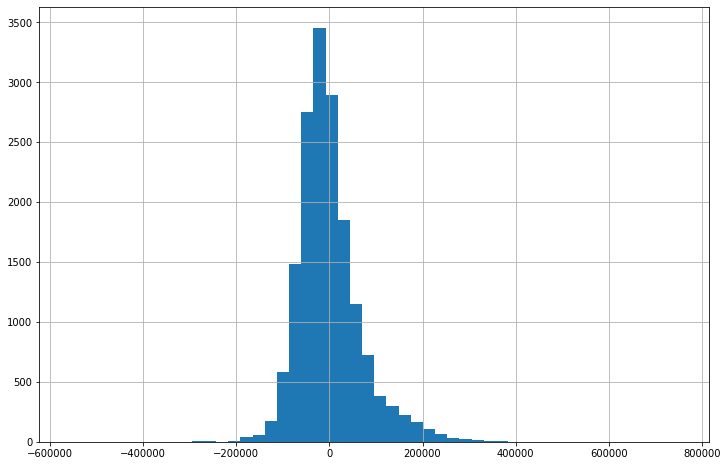

In [ ]:
# distribusi residual
res['residuals'].hist(bins = 50, figsize = (12, 8))

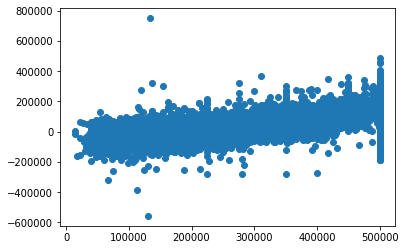

In [ ]:
# scatterplot
plt.scatter(res['actuals'], res['residuals'])
plt.show()

Kita dapat pula menghasilkan model regresi menggunakan modul statsmodel. Untuk melakukannya, jalankan perintah berikut:

In [ ]:
import statsmodels.api as sm

y = train_labels.reset_index()

lin_model=sm.OLS(y.median_house_value, train_df)
result=lin_model.fit()
print(result.summary2())

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                         Results: Ordinary least squares
Model:                   OLS                   Adj. R-squared:        0.648      
Dependent Variable:      median_house_value    AIC:                   414544.7454
Date:                    2020-09-07 13:17      BIC:                   414644.9994
No. Observations:        16512                 Log-Likelihood:        -2.0726e+05
Df Model:                12                    F-statistic:           2529.      
Df Residuals:            16499                 Prob (F-statistic):    0.00       
R-squared:               0.648                 Scale:                 4.6820e+09 
---------------------------------------------------------------------------------
                      Coef.     Std.Err.     t     P>|t|     [0.025      0.975]  
---------------------------------------------------------------------------------
longitude          -54485.9741  2261.3062 -24.0949 0.0000 -58918.3779 -50053.5703
latitude           -55016.3418  2376.3722

### *5.2 K-Nearest Neighbors*

K-nearest Neighbors (KNN) adalah algoritma yang sangat sederhana di mana setiap pengamatan diprediksi berdasarkan "kesamaan" dengan pengamatan lainnya. Tidak seperti kebanyakan metode lainnya, KNN adalah algoritma berbasis memori dan tidak dapat diringkas oleh model bentuk tertutup. Ini berarti sampel pelatihan diperlukan saat run-time dan prediksi dibuat langsung dari hubungan sampel. Akibatnya, KNN juga dikenal sebagai *lazy learners* (Cunningham dan Delany 2007) dan dapat menjadi tidak efisien secara komputasi. Namun, KNN telah berhasil dalam sejumlah besar masalah bisnis (Jiang et al. (2012) dan Mccord dan Chuah (2011)) dan berguna untuk tujuan preprocessing juga.

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# membuat model
nn_reg = KNeighborsRegressor()
nn_reg.fit(train_prepared, train_labels)

# validasi silang
nn_scores = cross_val_score(nn_reg, train_prepared, train_labels,
                         scoring="neg_mean_squared_error", cv=10)
nn_rmse_scores = np.sqrt(-nn_scores)

# nilai rmse validasi silang
display_scores(nn_rmse_scores)

Scores: [61020.48202751 62379.68479857 64012.46746108 57803.49029219
 58161.84977145 60426.68816943 58501.23136925 62956.37865034
 63037.12828335 61342.78916679]
Mean: 60964.21899899664
Standard deviation: 2095.381175270725


In [ ]:
pred = nn_reg.predict(train_prepared)
res = pd.DataFrame({'actuals' : train_labels,
                   'predictions' : pred})
res['residuals'] = res['actuals']-res['predictions']
res

,actuals,predictions,residuals
1862,103100.0,81120.0,21980.0
18832,62000.0,63180.0,-1180.0
2488,60400.0,99920.0,-39520.0
7637,218800.0,189640.0,29160.0
6941,190300.0,150960.0,39340.0
...,...,...,...
18768,116800.0,111440.0,5360.0
5066,98200.0,97480.0,720.0
4004,319100.0,345240.2,-26140.2
19318,120000.0,195340.0,-75340.0


<function matplotlib.pyplot.show>

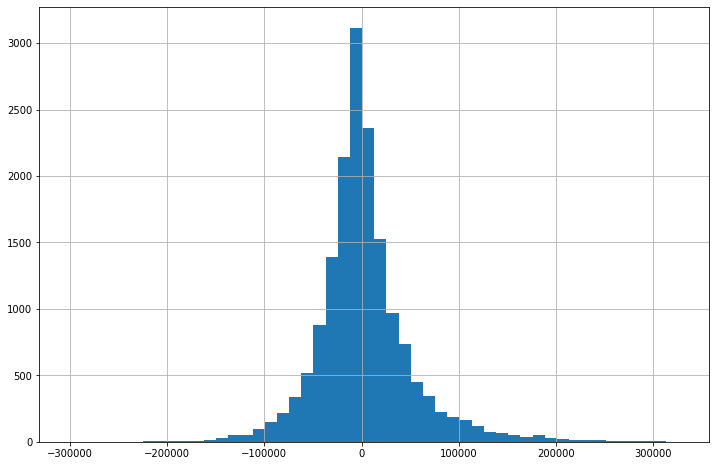

In [ ]:
# distribusi residual
res['residuals'].hist(bins = 50, figsize = (12, 8))
plt.show

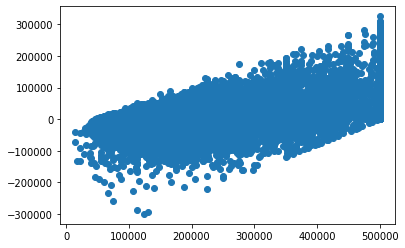

In [ ]:
# scatterplot
plt.scatter(res['actuals'], res['residuals'])
plt.show()

### *5.3 Ringkasan Hasil Training*

Terdapat 5 buah model yang telah di training pada bahasan di atas dengan ringkasan sebagai berikut:

| Model     | Mean RMSE       |  Sdt. RMSE          |
|:----------|:----------------|:--------------------|
| Regresi Linier | 68533.0996103821 | 1815.9446844041981 |
| K-Nearest Neighbors | 60964.21899899664| 2095.381175270725|

Berdasarkan hasil yang diperoleh terdapat sebuah model yang cukup menjanjikan untuk dilakukan tuning lanjutan, yaitu: K-Nearest Neighbors.

 

## **6 Parameter Tuning Model Terpilih**

Setelah model terpilih, model tersebut perlu dilakukan *tuning* untuk memperoleh parameter optimal pada model. Terdapat dua buah metode pencarian parameter optimal pada model, antara lain:

1. Grid Search
2. Randomized Search

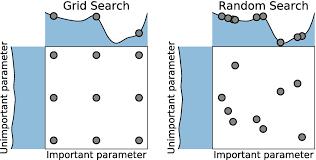



### *6.1 Grid Search*

Opsi pertama yang dapat kita gunakan untuk melakukan pencarian parameter optimal adalah metode *Grid Search*. Pada metode ini, kita membuat kombinasi hyper parameter model secara manual.

In [ ]:
# KNN

from sklearn.model_selection import GridSearchCV

param_grid = [{
    'n_neighbors' : list(range(2,20,3))
}]

nn_reg = KNeighborsRegressor()

grid_search = GridSearchCV(nn_reg, param_grid, cv=5,
  scoring='neg_mean_squared_error',
  return_train_score=True)

grid_search.fit(train_prepared, train_labels)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'n_neighbors': [2, 5, 8, 11, 14, 17]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_squared_error', verbose=0)

In [ ]:
grid_search.best_estimator_

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=14, p=2,
                    weights='uniform')

In [ ]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
  print(np.sqrt(-mean_score), params)

66389.46897567059 {'n_neighbors': 2}
61207.27371517463 {'n_neighbors': 5}
60327.40196598264 {'n_neighbors': 8}
60007.134549172464 {'n_neighbors': 11}
59983.815030374084 {'n_neighbors': 14}
60221.730730734766 {'n_neighbors': 17}


### *6.2 Randomized Search*

Metode grid search cukup baik apabila digunakan untuk menentukan model optimal dengan sedikit kombinasi hyperparameter. Namun jika hyperparameter sebuah model cukup banyak, disarankan untuk menggunakan metode randomized search. Metode ini akan mengevaluasi setiap kombinasi hyperparameter secara acak pada setiap iterasi.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {"n_neighbors": np.arange(2, 30, 2),
              "metric": ["euclidean", "cityblock"]}

# run randomized search
n_iter_search = 10

random_search = RandomizedSearchCV(nn_reg, param_distributions=param_dist, 
                                   cv =5,
                                   n_iter=n_iter_search,
                                   scoring='neg_mean_squared_error',
                                   return_train_score=True)

random_search.fit(train_prepared, train_labels)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                                 metric='minkowski',
                                                 metric_params=None,
                                                 n_jobs=None, n_neighbors=5,
                                                 p=2, weights='uniform'),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'metric': ['euclidean', 'cityblock'],
                                        'n_neighbors': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28])},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=True, scoring='neg_mean_squared_error',
                   verbose=0)

In [ ]:
random_search.best_estimator_

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='cityblock',
                    metric_params=None, n_jobs=None, n_neighbors=14, p=2,
                    weights='uniform')

In [ ]:
cvres = random_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
  print(np.sqrt(-mean_score), params)

60428.92403755534 {'n_neighbors': 28, 'metric': 'cityblock'}
59030.611977455446 {'n_neighbors': 8, 'metric': 'cityblock'}
60660.75914256386 {'n_neighbors': 22, 'metric': 'euclidean'}
60317.501172860284 {'n_neighbors': 18, 'metric': 'euclidean'}
61196.71897227604 {'n_neighbors': 28, 'metric': 'euclidean'}
60164.18643980118 {'n_neighbors': 16, 'metric': 'euclidean'}
60391.54229879643 {'n_neighbors': 4, 'metric': 'cityblock'}
58984.080071257835 {'n_neighbors': 14, 'metric': 'cityblock'}
66389.46897567059 {'n_neighbors': 2, 'metric': 'euclidean'}
60068.667752617934 {'n_neighbors': 10, 'metric': 'euclidean'}


## **7 Analisis Model Terbaik dan Error Prediksinya**

Analisis pertama yang dapat kita lakukan adalah melihat variabel paling berpengaruh terhadap performa prediksi model (feature importance).

In [ ]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances


array([0.10684897, 0.09736691, 0.0522226 , 0.03251477, 0.02804198,
       0.04036823, 0.02386367, 0.44416347, 0.01291919, 0.1532596 ,
       0.00052201, 0.00250462, 0.00540398])

In [ ]:
attributes = num_attribs + train['ocean_proximity'].unique().tolist()
sorted(zip(feature_importances, attributes), reverse=True)

[(0.4441634668339872, 'median_income'),
 (0.15325960496722843, 'INLAND'),
 (0.10684896852311057, 'longitude'),
 (0.09736690941262889, 'latitude'),
 (0.05222259663111709, 'housing_median_age'),
 (0.040368229358573725, 'population'),
 (0.03251476924694539, 'total_rooms'),
 (0.02804198308465572, 'total_bedrooms'),
 (0.023863672222771862, 'households'),
 (0.012919194522145232, 'NEAR OCEAN'),
 (0.005403982558474034, 'ISLAND'),
 (0.0025046155981779976, 'NEAR BAY'),
 (0.0005220070401838903, '<1H OCEAN')]

Output yang diperoleh tersebut dapat digunakan sebagai informasi untuk meningkatkan performa model, seperti membuang sejumlah kolom yang kurang berpengaruh terhadap nilai prediksi. Selain itu, informasi tersebut dapat pula kita gunakan sebagai panduan dalam menentukan kebijakan bisnis yang kita miliki. Sebagai contoh: nilai median hunian di distrik California ditentukan oleh `median_income` dari penduduknya. Dalam hal ini menunjukkan bahwa semakin tinggi (berdasarkan visualisasi data sebelumnya) `median_income` suatu distrik, maka semakin tinggi nilai median huniannya.

Analisis terakhir yang dapat kita lakukan adalah menganilisa error model dengan menggunakan data test.

In [ ]:
final_model = grid_search.best_estimator_
X_test = test.drop("median_house_value", axis=1)
y_test = test["median_house_value"].copy()
X_test_prepared = full_pipeline.transform(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error

final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse) 
final_rmse

50160.42778447569

Kita dapat pula memperoleh rentang statistik nilai error yang dihasilkan model kita.

In [ ]:
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
  loc=squared_errors.mean(),
  scale=stats.sem(squared_errors)))

array([47887.91560843, 52334.3536286 ])

## **8 Menyimpan Model dan Membuat Prediksi dengan Data Baru**

Pipeline penyiapan data untuk model dan model yang telah dilatih selanjutnya dapat disimpan agar dapat digunakan kembali atau dideploy sebagai web service.

In [ ]:
import pickle

with open("knn-model.pkl", 'wb') as file:
    pickle.dump(final_model, file)
with open("pipeline.pkl", 'wb') as file:
    pickle.dump(full_pipeline, file)


Untuk memuat model dan pipeline yang telah disimpan, jalankan perintah berikut:

In [ ]:
# Load model and pipeline
with open("model.pkl", 'rb') as file:
    model = pickle.load(file)

with open("pipeline.pkl", 'rb') as file:
    pipeline = pickle.load(file)
    


Lakukan transformasi terhadap data yang akan diprediksi hasilnya.

In [ ]:
predictor = data.drop("median_house_value", axis=1)

data_prepared = pipeline.fit_transform(predictor)

Inputkan data yang telah ditransformasi ke dalam model.

In [ ]:
pred = model.predict(data_prepared)
pred

array([440386.8       , 388583.36666667, 391276.66666667, ...,
        85490.        ,  87476.66666667,  94410.        ])